In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

# **De vorm van de gegevens begrijpen (Histogrammen, Heatmaps, enz.)**

In [3]:
traindf = pd.read_csv('data/train.csv')

In [4]:
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


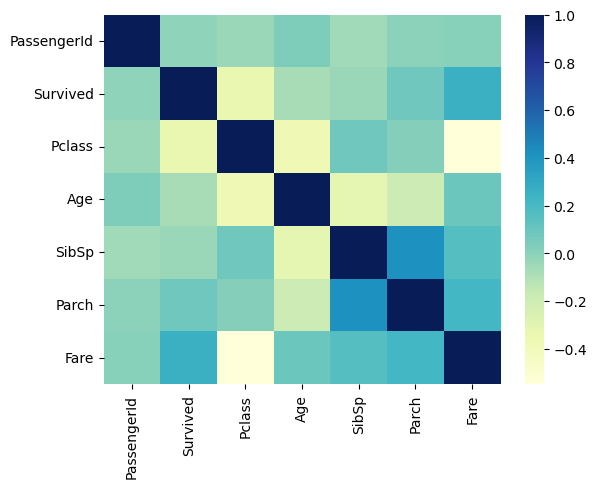

In [5]:
sns.heatmap(traindf.corr(), cmap='YlGnBu')
plt.show()

In [6]:
# traindf.drop(columns=["PassengerId", "Name", "Cabin", "Embarked"], inplace = True)
# traindf

# Survival chance by passenger class

{'1': 0.6296296296296297, '2': 0.47282608695652173, '3': 0.24236252545824846}


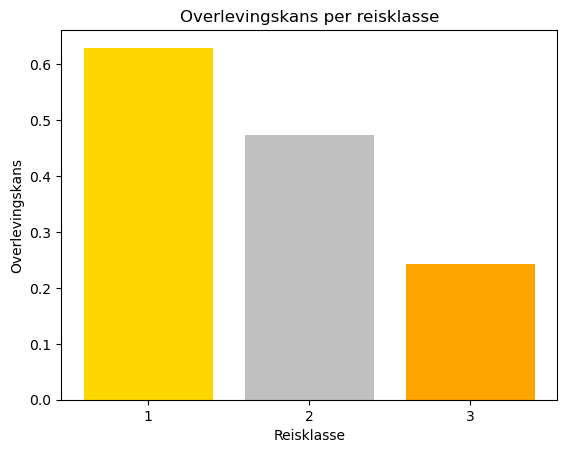

In [7]:
passengers_by_class = traindf.groupby('Pclass').count()
passengers_survived_by_class = traindf.groupby(['Pclass','Survived']).count()
classes = [1,2,3]
survival_chance_by_class = {}
for pclass in classes:
    survival_chance_by_class[str(pclass)] = (passengers_survived_by_class['PassengerId'][pclass] / passengers_by_class['PassengerId'][pclass])[1]
print(survival_chance_by_class)

fig,ax = plt.subplots()
ax.bar(x=list(survival_chance_by_class.keys()),height=survival_chance_by_class.values(),color=['gold','silver','orange'])
ax.set_xlabel('Reisklasse')
ax.set_ylabel('Overlevingskans')
ax.set_title("Overlevingskans per reisklasse")
plt.show()


In [8]:
sibling_totals = traindf['SibSp'].value_counts()

In [9]:
survived_siblings = traindf.loc[traindf['Survived']==1]['SibSp'].value_counts()

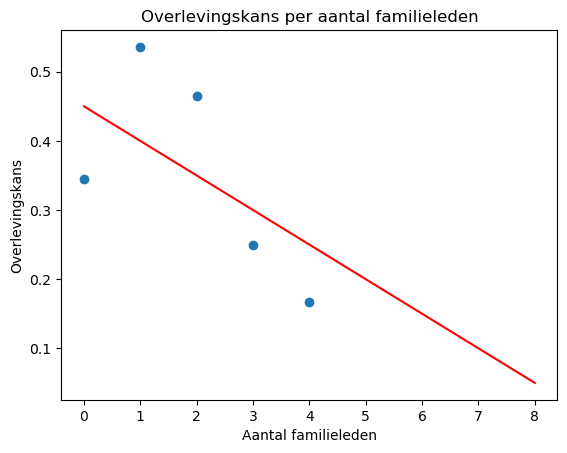

In [10]:
from sklearn import linear_model

siblings_dictionary = {}
siblings_dictionary

sibling_data = {
    'siblings_totals' : sibling_totals,
    'siblings_survived' : survived_siblings
}

df = pd.DataFrame(sibling_data)
df['siblings_survival_rate'] = df['siblings_survived'] / df['siblings_totals']

siblings_dictionary['totals'] = {}
siblings_dictionary['survived'] = {}

# reg = linear_model.LinearRegression()
# np_df = np.array([df.index,df['siblings_survival_rate']])
# np_df = np_df.transpose()
# np_df = np.nan_to_num(np_df, copy=True, nan=0.0, posinf=None, neginf=None)
# print(np_df)
# reg.fit(np_df, [0, 1, 2])
# print(reg.coef_)


class SiblingLinearRegression:
    def __init__(self):
        self.a = -0.05
        self.b = 0.45

    def f(self,x):
        return (self.a * x) + self.b

sblin = SiblingLinearRegression()

line = []
for value in df.index:
    line.append(sblin.f(value))

fig,ax = plt.subplots()
ax.scatter(x=df.index,y=df['siblings_survival_rate'])
ax.plot(df.index,line,c='r')
ax.set_xlabel("Aantal familieleden")
ax.set_ylabel("Overlevingskans")
ax.set_title("Overlevingskans per aantal familieleden")
plt.show()


In [11]:
# traindf['SibSp']=np.where(traindf['Survived']==0, 'Dood', 'levend')

In [12]:
# traindf['SibSp'].value_counts() #Er is te zien dat mensen met siblings/spouse meer doden dan levenden hebben

In [13]:
# dood,levend=traindf.SibSp.value_counts()

# dood_SibSp=(dood/(dood+levend))*100
# levend_SibSp=(levend/(dood+levend))*100

In [14]:
# dood_SibSp #61.6% van de mensen met Sib of Sp zijn dood 

In [15]:
# levend_SibSp #38.38 van de mensen met Sib of Sp zijn levend 

In [16]:
SurvivedbySiblings = pd.crosstab(index = traindf["Survived"], columns = traindf["Sex"])
SurvivedbySiblings

Sex,female,male
Survived,,
0,81,468
1,233,109


Geslacht invloed op overlevingskans

In [17]:
SurvivedbySex = pd.crosstab(index = traindf["Survived"], columns = traindf["Sex"])
SurvivedbySex

Sex,female,male
Survived,,
0,81,468
1,233,109


In [18]:
women = traindf.loc[traindf.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [19]:
men = traindf.loc[traindf.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [20]:
# Dictionary gender
genderdictionary = {"male" : rate_men, 
                    "female" : rate_women}

In [21]:
# fig,ax = plt.subplots()
# SurvivedbySex_percentage.iloc[1]['female']
# ax.bar(SurvivedbySex_percentage.iloc[1].index,SurvivedbySex_percentage.iloc[1])
# plt.show()


Aantal ouders / kinderen invloed op overlevingskans

In [22]:
# Crosstab van aantal overlevenden & aantal ouders/kinderen
SurvivedbyParch = pd.crosstab(index = traindf["Survived"], columns = traindf["Parch"])
SurvivedbyParch


Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445,53,40,2,4,4,1
1,233,65,40,3,0,1,0


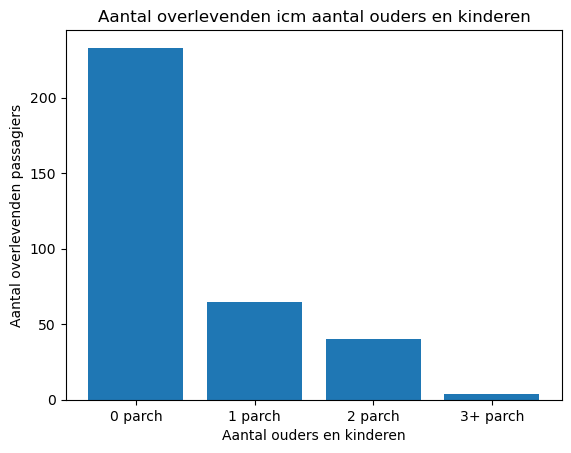

In [23]:
#Bar chart van aantal overleden 
overlevenden_parch = {
    '0 parch': (traindf[traindf['Survived'] == 1]['Parch'] == 0).sum(),
    '1 parch': (traindf[traindf['Survived'] == 1]['Parch'] == 1).sum(),
    '2 parch': (traindf[traindf['Survived'] == 1]['Parch'] == 2).sum(),
    '3+ parch': (traindf[traindf['Survived'] == 1]['Parch'] >= 3).sum()
}

plt.bar(overlevenden_parch.keys(), overlevenden_parch.values())
plt.xlabel("Aantal ouders en kinderen")
plt.ylabel("Aantal overlevenden passagiers")
plt.title("Aantal overlevenden icm aantal ouders en kinderen")

plt.show()


In [24]:
parch_totals = traindf['Parch'].value_counts()
survived_parch = traindf.loc[traindf['Survived']==1]['Parch'].value_counts()

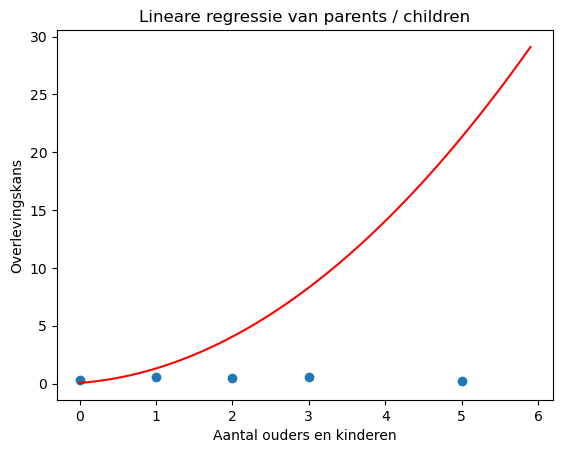

In [25]:
parch_dictionary = {}
parch_dictionary

parch_data = {
    'parch_totals' : parch_totals,
    'parch_survived' : survived_parch
}

df = pd.DataFrame(parch_data)
df['parch_survival_rate'] = df['parch_survived'] / df['parch_totals']

parch_dictionary['totals'] = {}
parch_dictionary['survived'] = {}

class ParchLinearRegression:
    def __init__(self):
        self.a = 0.75
        self.b = 0.50
        self.c = 0.05

    def f(self,x):
        return (self.a * (x ** 2)) + (self.b * x) + self.c

parchlin = ParchLinearRegression()

x = [i/10 for i in range(60)]
y = [parchlin.f(v) for v in x]
line = []
for value in df.index:
    line.append(parchlin.f(value))

fig,ax = plt.subplots()
ax.scatter(x=df.index,y=df['parch_survival_rate'])
ax.plot(x,y,c='r')
ax.set_title("Lineare regressie van parents / children")
ax.set_xlabel("Aantal ouders en kinderen")
ax.set_ylabel("Overlevingskans")
plt.show()

Boxplot leeftijd

In [26]:
traindf2 = traindf.copy()

traindf3 = traindf2.dropna()
#Boxplot data 
overleden_age = {'Overleefd': traindf3[traindf3['Survived'] == 1]['Age'],
                        'Overleden': traindf3[traindf3['Survived'] == 0]['Age']}



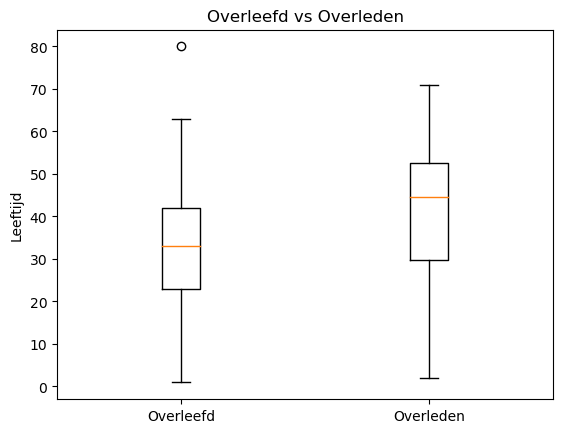

In [27]:
#code voor boxplot
fig, ax = plt.subplots()



ax.boxplot(overleden_age.values())

# ax.set_title('Title')
ax.set_title("Overleefd vs Overleden")
# ax.set_xticklabels(['Overleefd', Overleden])
ax.set_xticklabels(overleden_age.keys())
# ax.set_ylabel('Y')
ax.set_ylabel('Leeftijd')

plt.show()


# Prediction model

In [29]:

def predict_based_on_pclass(pclass):
    return survival_chance_by_class[str(pclass)]

def predict_based_on_sex(sex):
    return genderdictionary[sex]

def predict_based_on_siblings(siblings):
    return sblin.f(siblings)

def predict_based_on_parch(parch):
    return parchlin.f(parch)

def dataset_to_probabilities(dataset):
    predict_funcs = {
        "Pclass":predict_based_on_pclass,
        "Sex":predict_based_on_sex,
        "SibSp":predict_based_on_siblings,
        "Parch":predict_based_on_parch,
    }
    probabilities = []
    for row in dataset.iloc:
        probability_vector = []
        for key in row.keys():
            if key not in predict_funcs.keys():
                continue
                print('Could not make prediction for: {}'.format(key))
            else:
                probability_vector.append(predict_funcs[key](row[key]))
        probabilities.append(probability_vector)
    
    np_probabilities = np.array(probabilities)
    return np_probabilities


In [270]:
def ascii_bar(percent):
    return '[' + round(percent) * '=' + round(100.0 - percent) * ' ' + ']'

def prediction_model(probabilities : np.array,weights):
    predictions = probabilities.dot(weights.transpose())
    return np.where(predictions >= 0.5,1,0).transpose()

def calc_model_accuracy(weights):
    probabilities = dataset_to_probabilities(traindf)
    predictions = prediction_model(probabilities,weights)

    correct_vector = traindf['Survived'].to_numpy()
    total = len(correct_vector)
    scores = []
    for prediction in predictions:
        result = (correct_vector == prediction).sum()
        scores.append(result/total)
    return scores

best_weights = np.ndarray([])

def optimize():

    params_scores = {
        'Pclass':[],
        'Sex':[],
        'SibSp':[],
        'Parch':[],
        'scores':[],
    }
    weight_types = list(params_scores.keys())

    w_range = 10
    precision = 1.0/w_range

    weights = []

    for i in range(w_range):
        for j in range(w_range):
            for k in range(w_range):
                for l in range(w_range):
                    weight_vector = [
                        i * precision,
                        j * precision, 
                        k * precision,
                        l * precision,
                    ]
                    for i in range(len(weight_vector)):
                        params_scores[weight_types[i]].append(weight_vector[i])
                    weights.append(weight_vector)


    weight_matrix = np.array(weights)
    params_scores['scores'] = calc_model_accuracy(weight_matrix)

    

    params_scores_df = pd.DataFrame(params_scores).sort_values(by='scores',ascending=False)
    # print(params_scores_df.sort_values(by='scores',ascending=False).head(10))
    best_weights = params_scores_df.iloc[0].values[0:-1]
    print("best weights:",best_weights)
    
    params_scores_df.to_csv('param_scores.csv')

def gen_submission():
    weights=best_weights
    params = {'pclass_w': 0.5, 'gender_w': 0.3999999999999999, 'sibling_weight': 0.0, 'score': 0.8035914702581369}
    testset = pd.read_csv('data/test.csv')
    test_probs = dataset_to_probabilities(testset)
    testset['Survived'] = prediction_model(test_probs,weights)
    submission = testset[['PassengerId', 'Survived']].set_index('PassengerId')
    submission.to_csv('submission.csv')

optimize()

Pclass    0.300000
Sex       0.300000
SibSp     0.500000
Parch     0.000000
scores    0.803591
Name: 9350, dtype: float64
best weights: [0.3 0.3 0.5 0. ]


In [31]:
param_history = {
    0.7751 : {'pclass_w': 0.5, 'gender_w': 0.3999999999999999, 'sibling_weight': 0.0, 'score': 0.8035914702581369}
}

   Pclass  Sex  SibSp  Parch    scores
0     0.0  0.0    0.0    0.0  0.616162
1     0.3  0.0    0.0    0.1  0.631874
2     0.3  0.0    0.0    0.2  0.608305
3     0.3  0.0    0.0    0.3  0.638608
4     0.3  0.0    0.0    0.4  0.621773


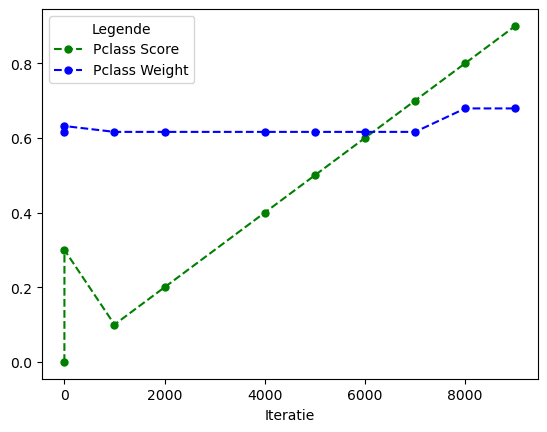

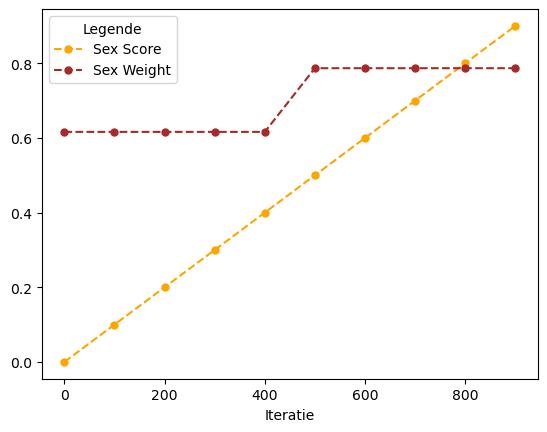

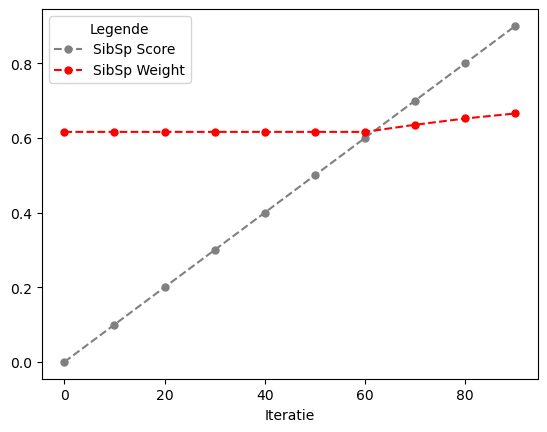

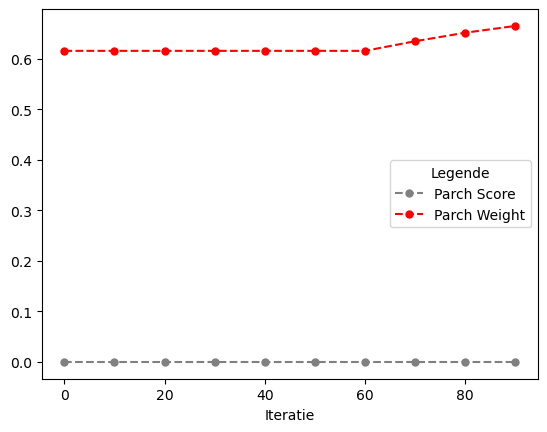

In [35]:
param_scores = pd.read_csv('param_scores.csv',index_col=0)
print(param_scores.head())

#pclass_weight visualization
pclass_data = param_scores.copy()
pclass_data = pclass_data.drop_duplicates('Pclass')
fig,ax = plt.subplots()
ax.plot(pclass_data['Pclass'], color='green', linestyle='dashed', marker='o',
     markerfacecolor='green', markersize=5)
ax.plot(pclass_data['scores'], color='blue', linestyle='dashed', marker='o',
     markerfacecolor='blue', markersize=5)
ax.set_xlabel("Iteratie")
plt.legend(["Pclass Score", "Pclass Weight"], loc='best', title='Legende')
plt.show()

#sex_weight visualization
sex_data = param_scores.copy()
sex_data = sex_data.drop_duplicates('Sex')
fig,ax = plt.subplots()
ax.plot(sex_data['Sex'], color='orange', linestyle='dashed', marker='o',
     markerfacecolor='orange', markersize=5)
ax.plot(sex_data['scores'], color='brown', linestyle='dashed', marker='o',
     markerfacecolor='brown', markersize=5)
ax.set_xlabel("Iteratie")
plt.legend(["Sex Score", "Sex Weight"], loc='best', title='Legende')
plt.show()

#sibling_weight visualization
sibling_data = param_scores.copy()
sibling_data = sibling_data.drop_duplicates('SibSp')
fig,ax = plt.subplots()
ax.plot(sibling_data['SibSp'], color='grey', linestyle='dashed', marker='o',
     markerfacecolor='grey', markersize=5)
ax.plot(sibling_data['scores'],  color='red', linestyle='dashed', marker='o',
     markerfacecolor='red', markersize=5)
ax.set_xlabel("Iteratie")
plt.legend(["SibSp Score", "SibSp Weight"], loc='best', title='Legende')
plt.show()
#parch_weight visualization EDIT
sibling_data = param_scores.copy()
sibling_data = sibling_data.drop_duplicates('SibSp')
fig,ax = plt.subplots()
ax.plot(sibling_data['Parch'], color='grey', linestyle='dashed', marker='o',
     markerfacecolor='grey', markersize=5)
ax.plot(sibling_data['scores'],  color='red', linestyle='dashed', marker='o',
     markerfacecolor='red', markersize=5)
ax.set_xlabel("Iteratie")
plt.legend(["Parch Score", "Parch Weight"], loc='best', title='Legende')
plt.show()

In [ ]:
cabindf = pd.read_csv('data/train.csv')

In [ ]:
cabindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Double Cabin verwijderen met een nieuwe dataframe 
cabindf.Cabin.count()
Totale_Survived = cabindf.Survived.sum()
print(Totale_Survived)



342


In [ ]:
cabindf.groupby(['Cabin']).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Cabin,,,,,,,,,,,
A10,1,1,1,1,1,1,1,1,1,1,1
A14,1,1,1,1,1,0,1,1,1,1,1
A16,1,1,1,1,1,1,1,1,1,1,1
A19,1,1,1,1,1,0,1,1,1,1,1
A20,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
F33,3,3,3,3,3,3,3,3,3,3,3
F38,1,1,1,1,1,0,1,1,1,1,1
F4,2,2,2,2,2,2,2,2,2,2,2


In [ ]:
cabindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
cabindf['Cabin'] = cabindf['Cabin'].fillna('na')

In [ ]:
cabindf['Cabin'] = cabindf['Cabin'].str.replace('\d+', '')



<ipython-input-87-c285d5ef40b5>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  cabindf['Cabin'] = cabindf['Cabin'].str.replace('\d+', '')


In [ ]:
def remove_duplicate_chars(string):
    if type(string) != str:
        return ''    
    return ''.join(set(string.replace(' ','')))




In [ ]:

cabindf['Cabin'] = cabindf['Cabin'].apply(remove_duplicate_chars)

In [ ]:
cabindf.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,na,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,na,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,na,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,na,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,na,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,na,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,na,C


In [ ]:
Totaal_cabin = cabindf['Cabin'].value_counts()
print(Totaal_cabin)

na    687
C      59
B      47
D      33
E      32
A      15
F       9
G       4
FG      3
FE      1
T       1
Name: Cabin, dtype: int64


In [ ]:
D_Cabin = cabindf.loc[cabindf['Survived']==1]['Cabin'].value_counts()
print(D_Cabin)



na    206
C      35
B      35
D      25
E      24
A       7
F       7
G       2
FE      1
Name: Cabin, dtype: int64


In [ ]:
CC = D_Cabin.Cabin.count()

AttributeError: ignored

In [ ]:
cabin_data = {
    'cabin_totals': Totaal_cabin,
    'cabin_survived': D_Cabin
}
print(cabin_data)
cabin_data_df = pd.DataFrame(cabin_data)
cabin_data_df['cabin_survival_rate'] = cabin_data_df['cabin_survived'] / cabin_data_df['cabin_totals']
print(cabin_data_df.head())

{'cabin_totals': na    687
C      59
B      47
D      33
E      32
A      15
F       9
G       4
FG      3
FE      1
T       1
Name: Cabin, dtype: int64, 'cabin_survived': na    206
C      35
B      35
D      25
E      24
A       7
F       7
G       2
FE      1
Name: Cabin, dtype: int64}
   cabin_totals  cabin_survived  cabin_survival_rate
A            15             7.0             0.466667
B            47            35.0             0.744681
C            59            35.0             0.593220
D            33            25.0             0.757576
E            32            24.0             0.750000
